<a href="https://colab.research.google.com/github/rami2ee3/DA_study/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# CSV 파일 불러오기
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv', header=0, encoding='CP949', engine='python')
# 불러온 데이터프레임 출력
print(data_df)
print(data_df.shape)
print(data_df.isna().sum())


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
(1338, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

data_df.sex = data_df.sex.map({'female':0, 'male':1})
data_df.sex = data_df.smoker.map({'yes':0, 'no':1})
data_df = pd.get_dummies(data_df, dtype='int')

Y = data_df['charges']
X = data_df.drop(['charges'], axis=1, inplace=False)

data_df


,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1,1725.55230,1,0,0,0,1,0
2,28,1,33.000,3,4449.46200,1,0,0,0,1,0
3,33,1,22.705,0,21984.47061,1,0,0,1,0,0
4,32,1,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,1,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,1,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,1,25.800,0,2007.94500,1,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

data_df2 = data_df.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=False)
data_df2_scaled = StandardScaler().fit_transform(data_df2.values)
data_df2 = pd.DataFrame(data_df2_scaled, columns=data_df2.columns)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [ ]:
lr_charges = LinearRegression()

In [ ]:
lr_charges.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_predict = lr_charges.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 34615521.905, RMSE : 5883.496
R^2(Variance score) : 0.732


In [ ]:
print('Y_ 절편 값: ', lr_charges.intercept_)
print('회귀 계수 값: ', np.round(lr_charges.coef_, 1))

Y_ 절편 값:  1943.995047151815
회귀 계수 값:  [  257.  -7871.5   381.1   471.1 -7871.5  7871.5   575.2   314.9  -401.4
  -488.7]


In [ ]:
coef = pd.Series(data = np.round(lr_charges.coef_,2), index = X.columns)
coef.sort_values(ascending=False)

,0
smoker_yes,7871.54
region_northeast,575.22
children,471.07
bmi,381.07
region_northwest,314.86
age,256.99
region_southeast,-401.36
region_southwest,-488.72
sex,-7871.54
smoker_no,-7871.54


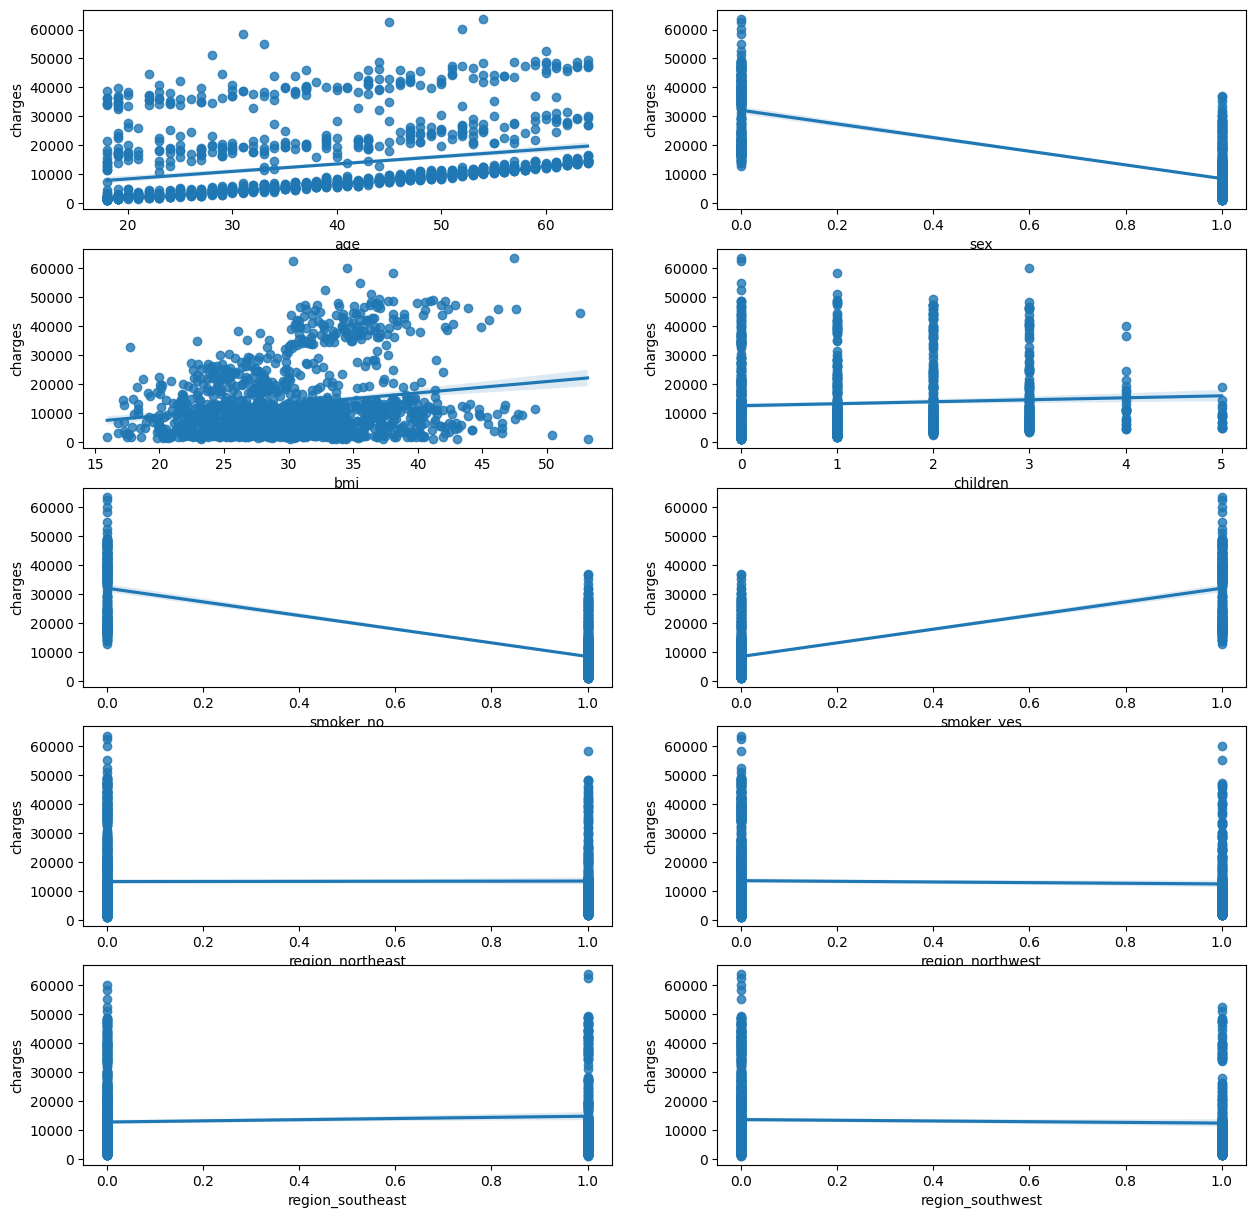

In [ ]:
fig, axs = plt.subplots(figsize=(15, 15), ncols=2, nrows=5)
x_features = list(X.columns)


for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2
      sns.regplot(x=feature, y='charges', data=data_df, ax=axs[row][col])


